In [1]:
%matplotlib inline

import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist

IMAGES_PATH = os.path.join('.', "images")

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = instances
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure digits


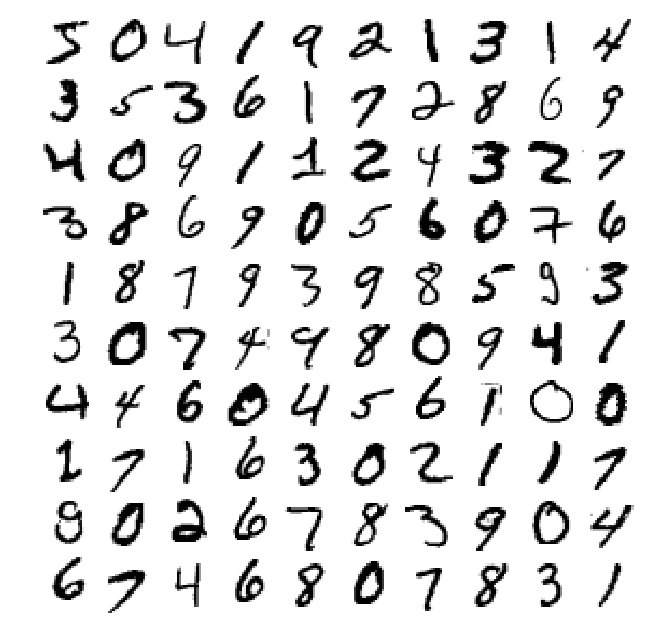

In [4]:
plt.figure(figsize=(9,9))
plot_digits(list(train_images[:100]), images_per_row=10)
save_fig('digits')
plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [10]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
from keras import models 
from keras import layers

network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

In [11]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

In [12]:
train_images.shape

(60000, 784)

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.2548 - acc: 0.9272
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1048 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0689 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0498 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0375 - acc: 0.9886


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 17us/step
test_acc: 0.9797


In [23]:
x = np.array(12)
print(x)

12


In [21]:
x.ndim

0

In [22]:
x = np.array([12, 3, 6, 14, 7])
print(x, x.ndim)

[12  3  6 14  7] 1


In [24]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])
print(x, x.ndim)

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] 2


In [28]:
x = np.array([[[5, 78, 2, 34, 0], [6, 79, 3, 35, 1]], [[5, 78, 2, 34, 0], [6, 79, 3, 35, 1]], [[5, 78, 2, 34, 0], [6, 79, 3, 35, 1]]])
x, x.ndim

(array([[[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1]],
 
        [[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1]],
 
        [[ 5, 78,  2, 34,  0],
         [ 6, 79,  3, 35,  1]]]), 3)

In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images[10:100].shape

(90, 28, 28)

In [31]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [34]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [35]:
x = np.array([[1, 2], [3, 4]])
print(x, x.ndim)

[[1 2]
 [3 4]] 2


In [45]:
y = np.array([[5, 6], [7, 8]])
y

array([[5, 6],
       [7, 8]])

In [46]:
np.dot(x, y)

array([[19, 22],
       [43, 50]])

In [48]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) 
    return x

In [49]:
naive_relu(z)

array([[20, 24],
       [44, 52]])

In [50]:
x+y

array([[ 6,  8],
       [10, 12]])

In [55]:
x = np.array([[1, 1], [2, 2]])
W = np.array([[1, 2], [3, 4]])

np.dot(W, x)

array([[ 5,  5],
       [11, 11]])

In [121]:
input_x = np.array([[2], [3], [1]])
# 权重
W = np.array([[5, 6, 1], [7, 8, 1]])
# 计算输出 z
z = np.dot(W, input_x)

# 实现激活函数
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) 
    return x

# 激活函数对应的输出
output = naive_relu(z)
output

array([[29],
       [39]])

In [100]:
input_x.shape

(2, 1)

In [149]:
input_x = np.array([[1], [3]])
# 权重
W = np.array([[5, 6], [7, 8]])
b = np.array([1])
# 计算输出 z
z = np.dot(W, input_x) + b
z

array([[24],
       [32]])

In [146]:
input_x = np.array([[1], [3]])
# 权重
W = np.array([[5, 6], [7, 8]])
# 计算输出 z
z = np.dot(W, input_x)
z + np.array([1, 1])

array([[24, 24],
       [32, 32]])

In [124]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1 
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i] 
    return z

In [125]:
x = np.array([1,2])
y = np.array([1,2])

In [126]:
naive_vector_dot(x, y)

5.0

In [132]:
# 输入示例
input_x = np.array([[2], [3], [1]])
# 权重
W = np.array([[5, 6, 1], [7, 8, 1]])
np.dot(W, input_x)

array([[29],
       [39]])

In [134]:
np.dot(W, [1, 2, 3])

array([20, 26])

In [135]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [141]:
x = np.array([[1,2],
              [3,4],
              [5,6],
              [7,8]]) # (4,2), 2阶张量
# 第一个加法操作:数据表x+矩阵(2阶张量)表示的一条记录
y = np.array([[2,1]]) # (1,2), 2阶张量,第一个维度必须为1
x + y # (4,2),2阶张量

# 第二个加法操作:数据表x加+向量(1阶张量)
y = np.array([2,1]) # (2,), 1阶张量
x + y # (4,2),2阶张量

array([[3, 3],
       [5, 5],
       [7, 7],
       [9, 9]])

In [144]:
x + y

array([[3, 3],
       [5, 5],
       [7, 7],
       [9, 9]])

In [147]:
x + np.array([1, 1])

array([[2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
from keras import models 
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)


network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)